# Assignment 3: Song Clustering and Classification

Importing all the classes we need for the notebook

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
import tensorflow as tf
from tensorflow.keras import layers, models, Input

# Loading and Preprocessing the Dataset
We load the dataset and we examine it in order to know the structure and the data. 
Afterwards we clean it and preparing it for the tasks. 


In [2]:
# Load the dataset
df = pd.read_json("data_archive_20190201.json")
df = df.T  
print(df.info())
print(df.head())
df

<class 'pandas.core.frame.DataFrame'>
Index: 1107 entries, 0 to 1106
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   trackId          1107 non-null   object
 1   artists          1107 non-null   object
 2   songTitle        1107 non-null   object
 3   features         1107 non-null   object
 4   activityType     1107 non-null   object
 5   clusteringLabel  1107 non-null   object
 6   youtubeId        1107 non-null   object
 7   youtubeURL       1107 non-null   object
 8   spotifyTrackURL  1107 non-null   object
dtypes: object(9)
memory usage: 118.8+ KB
None
                  trackId                                artists  \
0  3Vo4wInECJQuz9BIBMOu8i                  [Bruno Mars, Cardi B]   
1  7ef4DlsgrMEH11cDZd32M6              [Calvin Harris, Dua Lipa]   
2  3Nou5g8qSke2RT562MoAtn                      [Monique Namaste]   
3  5wfHmgTmRjXVdVTn7YVKtx    [Cameron, Yoga Music, Spa, Massage]   
4  4oIZXnjmEjq2FW

,trackId,artists,songTitle,features,activityType,clusteringLabel,youtubeId,youtubeURL,spotifyTrackURL
0,3Vo4wInECJQuz9BIBMOu8i,"[Bruno Mars, Cardi B]",Finesse (Remix) [feat. Cardi B],"{'chordsScale': 'minor', 'chordsKey': 'F', 'bp...",exercising,intense,GIfa9Y4vxi8,https://www.youtube.com/watch?v=GIfa9Y4vxi8,https://open.spotify.com/track/3Vo4wInECJQuz9B...
1,7ef4DlsgrMEH11cDZd32M6,"[Calvin Harris, Dua Lipa]",One Kiss (with Dua Lipa),"{'chordsScale': 'minor', 'chordsKey': 'A', 'bp...",exercising,intense,XWCPbRsMb0Q,https://www.youtube.com/watch?v=XWCPbRsMb0Q,https://open.spotify.com/track/7ef4DlsgrMEH11c...
2,3Nou5g8qSke2RT562MoAtn,[Monique Namaste],Water Harp,"{'chordsScale': 'minor', 'chordsKey': 'F', 'bp...",relaxing,calm,LMz_ggmEKws,https://www.youtube.com/watch?v=LMz_ggmEKws,https://open.spotify.com/track/3Nou5g8qSke2RT5...
3,5wfHmgTmRjXVdVTn7YVKtx,"[Cameron, Yoga Music, Spa, Massage]",Epic Dream,"{'chordsScale': 'major', 'chordsKey': 'G', 'bp...",relaxing,calm,LSLmVdtd8_0,https://www.youtube.com/watch?v=LSLmVdtd8_0,https://open.spotify.com/track/5wfHmgTmRjXVdVT...
4,4oIZXnjmEjq2FWMBl1D8ef,"[Cameron, Yoga Music, Meditation Spa]",Tantric Sleep,"{'chordsScale': 'major', 'chordsKey': 'D', 'bp...",relaxing,calm,Snib7unaL_4,https://www.youtube.com/watch?v=Snib7unaL_4,https://open.spotify.com/track/4oIZXnjmEjq2FWM...
...,...,...,...,...,...,...,...,...,...
1102,7ebPAk43v3s7CMK5xSCpmU,[Pink Martini],Una Notte a Napoli (First Recording),"{'chordsScale': 'minor', 'chordsKey': 'A', 'bp...",dinner,vibrant,SCN187203Q4,https://www.youtube.com/watch?v=SCN187203Q4,https://open.spotify.com/track/7ebPAk43v3s7CMK...
1103,4nYKI0JqkWfr1YbmH4ADEM,"[State of Sound, Viktor Norén, Gustaf Norén]",Higher Love,"{'chordsScale': 'major', 'chordsKey': 'C', 'bp...",dinner,vibrant,WtUIeHlE4pw,https://www.youtube.com/watch?v=WtUIeHlE4pw,https://open.spotify.com/track/4nYKI0JqkWfr1Yb...
1104,3U4isOIWM3VvDubwSI3y7a,[John Legend],All of Me,"{'chordsScale': 'major', 'chordsKey': 'G#', 'b...",dinner,vibrant,Mk7-GRWq7wA,https://www.youtube.com/watch?v=Mk7-GRWq7wA,https://open.spotify.com/track/3U4isOIWM3VvDub...
1105,2ZrHbO88rM6Ijeg0aJmSzl,[Charlie Puth],Patient,"{'chordsScale': 'major', 'chordsKey': 'C#', 'b...",dinner,vibrant,uKmA0nHe4no,https://www.youtube.com/watch?v=uKmA0nHe4no,https://open.spotify.com/track/2ZrHbO88rM6Ijeg...


# Data Preprocessing
We handle missing data, encode categorical features, and scale the data. We ensure that all data is in the correct format for clustering and classification.
- Encoding: The columns that are categorical we convert them into numerical values using label encoding.
- Scaling: In neural networks scaling the features is important in order to have better performance.


In [3]:
# Function to safely load JSON data only if it's a string
def safely_load_json(item):
    if isinstance(item, str):
        return json.loads(item)
    return item  # Return the item as-is if it's already a dictionary

df['features'] = df['features'].apply(safely_load_json)

features_df = pd.json_normalize(df['features'])

df_cleaned = pd.concat([df, features_df], axis=1)

df_cleaned.drop(columns=['features'], inplace=True)

print(df_cleaned.head())

# Filling missing values where its needed
df_cleaned = df_cleaned.fillna(0)

features = ['chordsScale', 'chordsKey', 'bpm', 'rhythmHist', 'regularity', 'rhythmPattern', 'keyKey', 'loudness', 'pitchBiHist', 'keyScale']

categorical_features = ['chordsScale', 'chordsKey', 'keyKey', 'keyScale']
numerical_features = ['bpm', 'regularity', 'loudness']

                  trackId                                artists  \
0  3Vo4wInECJQuz9BIBMOu8i                  [Bruno Mars, Cardi B]   
1  7ef4DlsgrMEH11cDZd32M6              [Calvin Harris, Dua Lipa]   
2  3Nou5g8qSke2RT562MoAtn                      [Monique Namaste]   
3  5wfHmgTmRjXVdVTn7YVKtx    [Cameron, Yoga Music, Spa, Massage]   
4  4oIZXnjmEjq2FWMBl1D8ef  [Cameron, Yoga Music, Meditation Spa]   

                         songTitle activityType clusteringLabel    youtubeId  \
0  Finesse (Remix) [feat. Cardi B]   exercising         intense  GIfa9Y4vxi8   
1         One Kiss (with Dua Lipa)   exercising         intense  XWCPbRsMb0Q   
2                       Water Harp     relaxing            calm  LMz_ggmEKws   
3                       Epic Dream     relaxing            calm  LSLmVdtd8_0   
4                    Tantric Sleep     relaxing            calm  Snib7unaL_4   

                                    youtubeURL  \
0  https://www.youtube.com/watch?v=GIfa9Y4vxi8   
1  https:/

In [4]:
# Preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

df_features_cleaned = df_cleaned[features]
print(df_features_cleaned.head())

  chordsScale chordsKey         bpm  \
0       minor         F  104.992523   
1       minor         A  123.547798   
2       minor         F  103.211197   
3       major         G  116.554108   
4       major         D  154.680176   

                                          rhythmHist  regularity  \
0  [16.8285816268, 13.671369549, 12.3919854605, 1...    1.254250   
1  [21.1346154077, 18.6496586356, 16.3906795752, ...    1.325307   
2  [10.1532813965, 5.9777501213, 6.4212765238, 4....    0.948574   
3  [20.8648159848, 14.171234524599999, 10.3256045...    1.012330   
4  [10.6034373863, 5.3603348431, 4.4752242598, 3....    1.076835   

                                       rhythmPattern keyKey   loudness  \
0  [0.044795403000000004, 0.052395507800000005, 0...      F  -9.026863   
1  [0.0177695819, 0.027610449300000003, 0.0229472...      A  -6.811761   
2  [0.0185314204, 0.0444592176, 0.034440893800000...      F -11.597279   
3  [0.0142917145, 0.0385265817, 0.0566188779, 0.0...      G 

### We apply the preprocessing to be ready for clustering

In [5]:
X_preprocessed = preprocessor.fit_transform(df_cleaned[features])

print(X_preprocessed.shape)

(1107, 31)


### Elbow Method for Optimal Number of Clusters

The Elbow method is a heuristic used in determining the optimal number of clusters in a dataset. It works by calculating the sum of squared errors (SSE) for different values of k (number of clusters). We plot the SSE values for each k and select the k where the decrease in SSE slows down, forming an "elbow."

In this case, the plot below shows the SSE for cluster values from 2 to 9. Based on the plot, we can identify the optimal number of clusters.


In [6]:
# Elbow method to find the optimal number of clusters
inertia = []
silhouette_scores = []
K = range(2, 10)  

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_preprocessed)
    inertia.append(kmeans.inertia_)
    
    # Silhouette score for each k
    silhouette_avg = silhouette_score(X_preprocessed, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

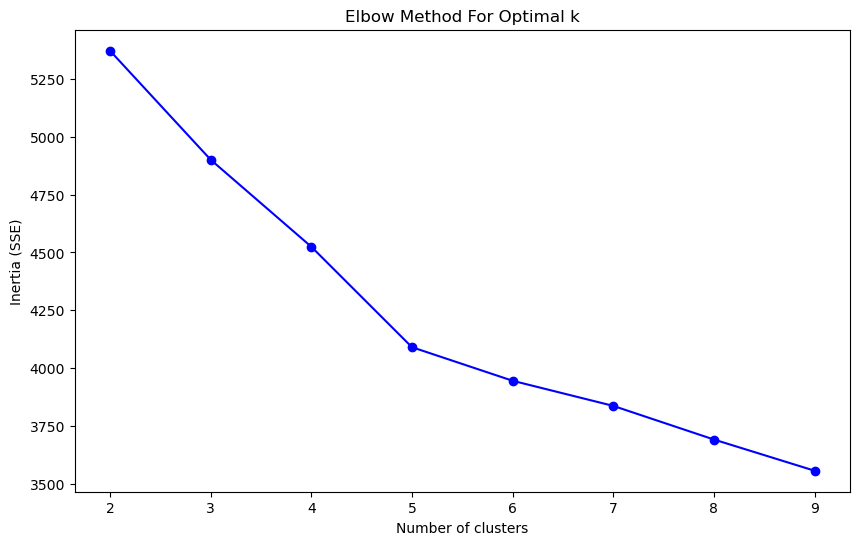

In [7]:
# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()

### Silhouette Score for Clusters

The silhouette score is another metric used to evaluate the quality of clusters. It measures how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, with higher values indicating better-defined clusters.

Below is a plot of the silhouette score for different values of k (from 2 to 9 clusters). This helps us evaluate which number of clusters provides the best separation.


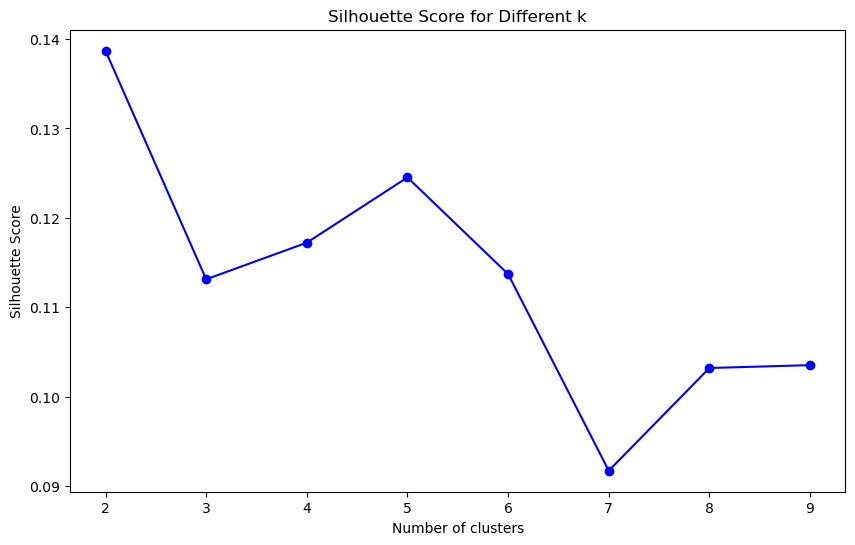

In [8]:
# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.show()

### PCA Visualization of KMeans Clustering

To visualize the clusters obtained from KMeans, we apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset. This allows us to plot the data points in 2D space while preserving as much variance as possible.

The scatter plot below shows the KMeans clusters, where each color represents a different cluster. This visualization helps us understand the separation between the clusters in the dataset.


In [10]:
# Run KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned['cluster'] = kmeans.fit_predict(X_preprocessed)

df_cleaned['cluster'] = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

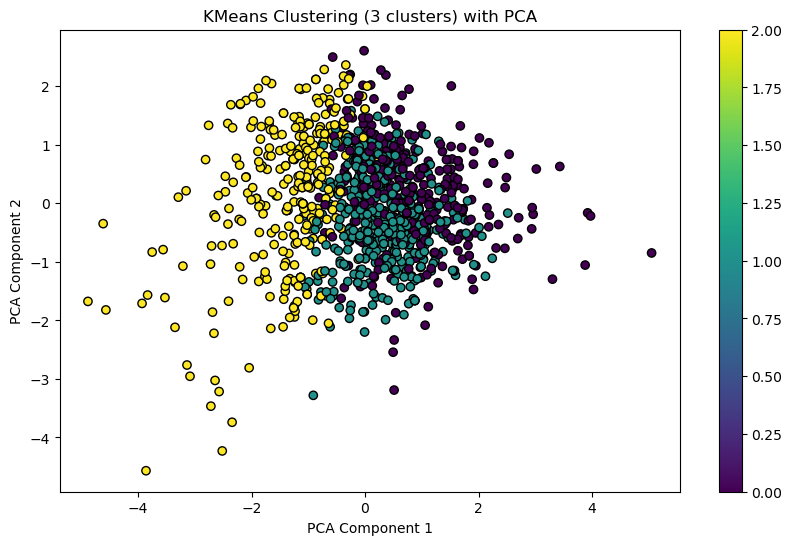

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_cleaned['cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (3 clusters) with PCA')
plt.colorbar()
plt.show()

In [12]:
author_clusters = df_cleaned['activityType']

comparison = pd.crosstab(df_cleaned['cluster'], author_clusters)

print("Comparison between my clusters and the authors' clusters:")
print(comparison)

Comparison between my clusters and the authors' clusters:
activityType  breakfast  commuting  dinner  drinking  driving  exercising  \
cluster                                                                     
0                    15         19      14        19       37          40   
1                    44         23      45        50       29          24   
2                    26         14      29        25       17           6   

activityType  lunch  office  partying  relaxing  running  sex  sleeping  \
cluster                                                                   
0                19      22        34        18       40   54         7   
1                37      36        20        28       30   30        20   
2                30      25         7        41        7    9        42   

activityType  studying  
cluster                 
0                   23  
1                   27  
2                   25  


## Comparison of Our Clusters vs. Author's Clusters

Comparing the clusters we obtained through KMeans with the activity types from the original dataset. The table below shows the frequency of each activity type within the clusters.

By comparing this to the authors' clusters, we can interpret how well our clustering algorithm has captured the different activity patterns and how it differs from their findings.


## Results and Insights

### Boxplots of Song Characteristics
- **Description**: The boxplots show the distribution of song characteristics across three categories: Calm, Vibrant, and Intense. 
  - **BPM (Beats Per Minute)**: This represents the tempo of the songs. As expected, Calm songs have lower BPM on average compared to Vibrant and Intense categories.
  - **Loudness**: Loudness increases as the energy of the category increases, with Calm songs being the quietest and Intense songs the loudest.
  - **Danceability**: Danceability scores show variability, with Intense songs having slightly higher danceability on average.

- **Key Insights**:
  - Intense songs are faster, louder, and more danceable.
  - Calm songs tend to have lower BPM, quieter volumes, and less danceability.

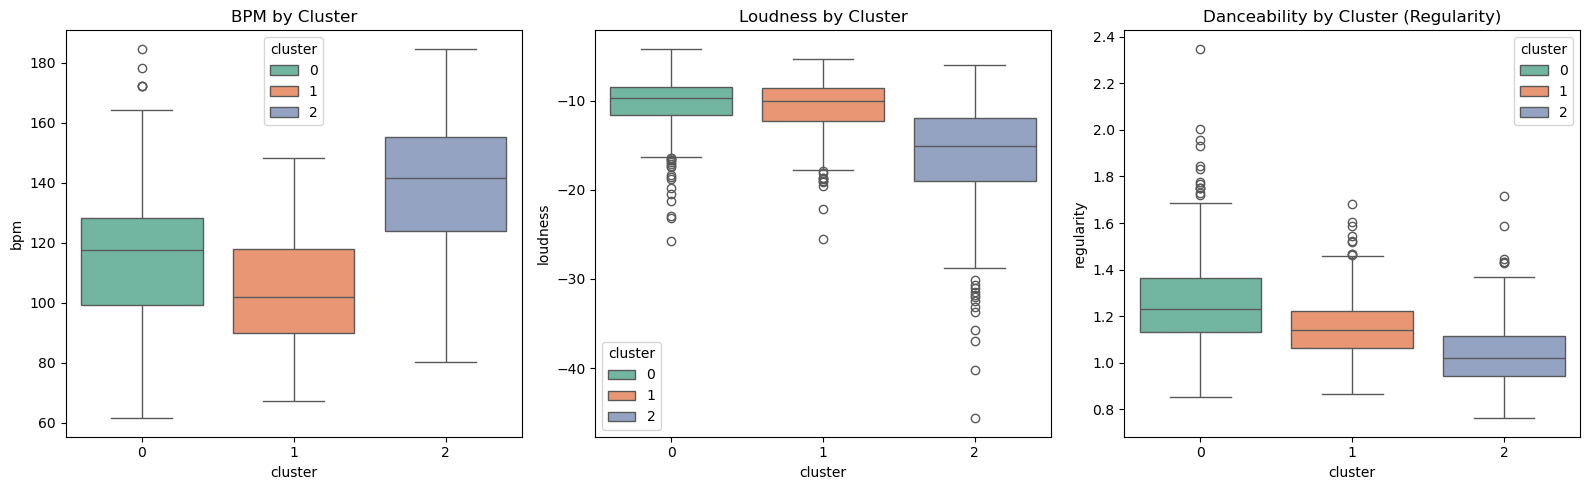

In [13]:
plt.figure(figsize=(16, 5))

# Boxplot for BPM
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster', y='bpm', data=df_cleaned, hue='cluster', palette="Set2", dodge=False)
plt.title('BPM by Cluster')

# Boxplot for Loudness
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster', y='loudness', data=df_cleaned, hue='cluster', palette="Set2", dodge=False)
plt.title('Loudness by Cluster')

# Boxplot for Danceability
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster', y='regularity', data=df_cleaned, hue='cluster', palette="Set2", dodge=False)
plt.title('Danceability by Cluster (Regularity)')

plt.tight_layout()
plt.show()

### Radar Plot of Key Signatures
- **Description**: The radar plot visualizes the distribution of key signatures for songs across the three categories (Calm, Vibrant, and Intense).
  - Each axis represents a musical key (e.g., C major, G major, A minor).
  - The shaded areas correspond to the proportion of songs in each category associated with a particular key.

- **Key Insights**:
  - Vibrant songs (red area) dominate in a wider range of keys, particularly F major and G major.
  - Calm songs (blue area) are more evenly distributed across keys but show preference for C major and A minor.
  - Intense songs (green area) concentrate in fewer keys, particularly A minor and G major.

---

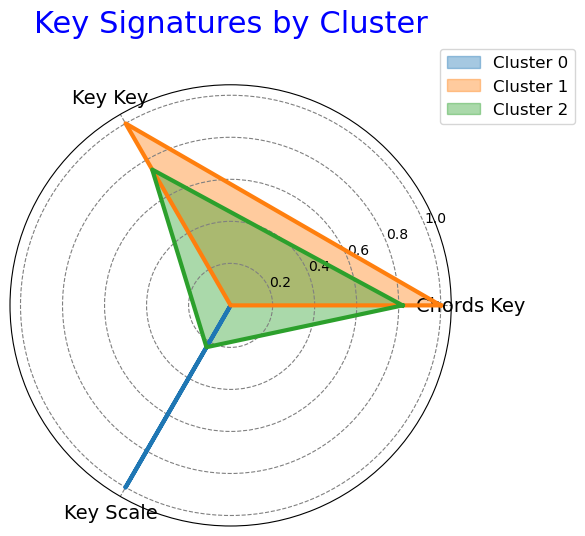

In [14]:
key_features = ['chordsKey', 'keyKey', 'keyScale']

# Applying LabelEncoder to convert string categories into numerical values
label_encoders = {}
for feature in key_features:
    le = LabelEncoder()
    df_cleaned[feature + '_encoded'] = le.fit_transform(df_cleaned[feature].astype(str))
    label_encoders[feature] = le 

encoded_key_features = [feature + '_encoded' for feature in key_features]

# Calculate mean for each cluster
cluster_means = df_cleaned.groupby('cluster')[encoded_key_features].mean()

# Normalize for radar chart 
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

cluster_means_normalized = cluster_means.apply(normalize)


num_vars = cluster_means_normalized.shape[1]

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] 

for cluster_idx, color in zip(cluster_means_normalized.index, colors):
    values = cluster_means_normalized.iloc[cluster_idx].tolist()
    values += values[:1]  

    ax.fill(angles, values, color=color, alpha=0.4, label=f'Cluster {cluster_idx}')
    ax.plot(angles, values, color=color, linewidth=3, linestyle='solid')

feature_labels = ['Chords Key', 'Key Key', 'Key Scale']
plt.xticks(angles[:-1], feature_labels, color='black', size=14)

ax.yaxis.set_tick_params(labelsize=10, color='grey')
ax.grid(color='grey', linestyle='--')

ax.set_title('Key Signatures by Cluster', size=22, color='blue', y=1.1)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)

plt.tight_layout()
plt.show()

## CLASSIFICATION

## 1. Defining Features and Preprocessing

We define the features (`X`) and target variable (`y`) and perform preprocessing steps:
- Non-numeric columns that cannot be used in the models are removed.
- The dataset is split into training and testing sets (80% training, 20% testing).
- Feature scaling is applied where necessary for models sensitive to feature magnitudes.

In [15]:
print(df_cleaned.dtypes)

non_numeric_columns = df_cleaned.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

trackId               object
artists               object
songTitle             object
activityType          object
clusteringLabel       object
youtubeId             object
youtubeURL            object
spotifyTrackURL       object
chordsScale           object
chordsKey             object
bpm                  float64
rhythmHist            object
regularity           float64
rhythmPattern         object
keyKey                object
loudness             float64
pitchBiHist           object
keyScale              object
cluster                int32
chordsKey_encoded      int32
keyKey_encoded         int32
keyScale_encoded       int32
dtype: object
Non-numeric columns: Index(['trackId', 'artists', 'songTitle', 'activityType', 'clusteringLabel',
       'youtubeId', 'youtubeURL', 'spotifyTrackURL', 'chordsScale',
       'chordsKey', 'rhythmHist', 'rhythmPattern', 'keyKey', 'pitchBiHist',
       'keyScale'],
      dtype='object')


In [16]:
non_numeric_columns = ['trackId', 'artists', 'songTitle', 'activityType', 'clusteringLabel',
                       'youtubeId', 'youtubeURL', 'spotifyTrackURL', 'chordsScale',
                       'chordsKey', 'rhythmHist', 'rhythmPattern', 'keyKey', 'pitchBiHist', 'keyScale']

X = df_cleaned.drop(columns=non_numeric_columns + ['cluster'])  
y = df_cleaned['cluster']  

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random Forest Classifier
The Random Forest Classifier is chosen as the first baseline model. It is robust, handles non-scaled data, and provides feature importance, which helps identify key variables influencing classification.



In [17]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_report = classification_report(y_test, rf_preds)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(rf_report)

Random Forest Accuracy: 0.8648648648648649
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        66
           1       0.84      0.94      0.89        83
           2       0.89      0.89      0.89        73

    accuracy                           0.86       222
   macro avg       0.87      0.86      0.86       222
weighted avg       0.87      0.86      0.86       222



### Results
- **Accuracy**: `86.49%`
- **Classification Report**:
    - Class 0: Precision = 88%, Recall = 74%, F1-score = 80%
    - Class 1: Precision = 84%, Recall = 94%, F1-score = 89%
    - Class 2: Precision = 89%, Recall = 89%, F1-score = 89%

The Random Forest model performs well with an accuracy of 86.49%. However, it slightly underperforms in predicting Class 0, as indicated by lower recall. This could be due to class imbalance or overlapping features between classes.

### XGBoost
XGBoost is a powerful gradient-boosting algorithm known for its speed and accuracy. Feature scaling is applied to improve its convergence.

In [18]:
# XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
xgb_preds = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, xgb_preds)
xgb_report = classification_report(y_test, xgb_preds)

print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:")
print(xgb_report)

XGBoost Accuracy: 0.8918918918918919
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        66
           1       0.87      0.94      0.90        83
           2       0.93      0.90      0.92        73

    accuracy                           0.89       222
   macro avg       0.89      0.89      0.89       222
weighted avg       0.89      0.89      0.89       222



### Results
- **Accuracy**: `89.19%`
- **Classification Report**:
    - Class 0: Precision = 89%, Recall = 82%, F1-score = 85%
    - Class 1: Precision = 87%, Recall = 94%, F1-score = 90%
    - Class 2: Precision = 93%, Recall = 90%, F1-score = 92%

XGBoost outperforms Random Forest, achieving an accuracy of 89.19%. The improvement in precision and recall for Class 2 highlights its ability to handle complex relationships in the data.

### LightGBM
LightGBM, another gradient-boosting algorithm, is tested for its efficiency and performance. Feature scaling is again applied.

In [19]:
# LightGBM Classifier
lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=42, verbose=-1)
lgb_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
lgb_preds = lgb_model.predict(X_test_scaled)
lgb_accuracy = accuracy_score(y_test, lgb_preds)
lgb_report = classification_report(y_test, lgb_preds)

print("LightGBM Accuracy:", lgb_accuracy)
print("LightGBM Classification Report:")
print(lgb_report)

LightGBM Accuracy: 0.8918918918918919
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        66
           1       0.86      0.94      0.90        83
           2       0.94      0.90      0.92        73

    accuracy                           0.89       222
   macro avg       0.90      0.89      0.89       222
weighted avg       0.89      0.89      0.89       222



### Results
- **Accuracy**: `89.19%`
- **Classification Report**:
    - Class 0: Precision = 89%, Recall = 82%, F1-score = 85%
    - Class 1: Precision = 86%, Recall = 94%, F1-score = 90%
    - Class 2: Precision = 94%, Recall = 90%, F1-score = 92%

LightGBM achieves the same accuracy as XGBoost (89.19%). It provides similar classification metrics and is slightly more efficient in handling large datasets.

### CatBoost
Here we evaluate with the CatBoost, as it efficiently handles categorical data without explicit encoding and delivers high performance.

In [21]:
# CatBoost Classifier
cat_model = CatBoostClassifier(n_estimators=100, random_state=42, verbose=0, allow_writing_files=False)
cat_model.fit(X_train, y_train)

# Predictions and evaluation
cat_preds = cat_model.predict(X_test)
cat_accuracy = accuracy_score(y_test, cat_preds)
cat_report = classification_report(y_test, cat_preds)

print("CatBoost Accuracy:", cat_accuracy)
print("CatBoost Classification Report:")
print(cat_report)

CatBoost Accuracy: 0.9009009009009009
CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87        66
           1       0.88      0.93      0.90        83
           2       0.92      0.93      0.93        73

    accuracy                           0.90       222
   macro avg       0.90      0.90      0.90       222
weighted avg       0.90      0.90      0.90       222



### Results
- **Accuracy**: `90.09%`
- **Classification Report**:
    - Class 0: Precision = 92%, Recall = 83%, F1-score = 87%
    - Class 1: Precision = 88%, Recall = 93%, F1-score = 90%
    - Class 2: Precision = 92%, Recall = 93%, F1-score = 93%
    
CatBoost performs the best among the models, achieving an accuracy of 90.09%. Its superior handling of categorical and numerical data likely contributes to this performance.

### Neural Network
We implement a Neural network using TensorFlow/Keras to evaluate its performance on the dataset. This approach explores non-linear patterns in the data.

In [24]:
# Neural Network using TensorFlow/Keras
model = models.Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(len(y.unique()), activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluation
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("Neural Network (TensorFlow) Test Accuracy:", test_acc)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.6021 - loss: 0.9725 - val_accuracy: 0.8739 - val_loss: 0.6097
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8659 - loss: 0.5110 - val_accuracy: 0.8874 - val_loss: 0.3312
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8758 - loss: 0.3428 - val_accuracy: 0.8739 - val_loss: 0.2792
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8488 - loss: 0.3231 - val_accuracy: 0.8874 - val_loss: 0.2633
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8753 - loss: 0.2858 - val_accuracy: 0.9099 - val_loss: 0.2687
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8672 - loss: 0.2844 - val_accuracy: 0.9009 - val_loss: 0.2710
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8926 - loss: 0.2521 - val_accuracy: 0.9054 - val_loss: 0.2550
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8966 - loss: 0.2583 - val_accuracy: 0.8829 - v

### Results
The Neural Network achieves the highest accuracy (91.44%). While it performs slightly better than CatBoost, the added complexity and training time should be considered when selecting the best model.

- **Accuracy**: `91.44%`
- *Training Insights*:
    - Accuracy improves steadily across 20 epochs, reaching ~92% on the test set.
    - Loss decreases consistently, indicating good model optimization.
